In [164]:
# LEVANTAMOS LAS BASES DE LOS CUATRO TRIMESTRES DE VIAJES PRESTADOS POR LINEA#
from google.colab import drive
drive.mount('/content/drive/', force_remount=True )
import pandas as pd
#%cd /content/drive/My Drive/bases_mentoria/
#path= '/content/drive/My Drive/bases_mentoria/primer trimestre 2019'
path= '/content/drive/My Drive/Tarjetas prestadas por dia semana'
import glob
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, encoding='latin-1', sep=","))

# Concatenate all data into one DataFrame
big_frame = pd.concat(dfs, ignore_index=True)

big_frame.head()

Mounted at /content/drive/


,CANT_VIAJES_S_DUPL,CANT_VIAJES_TOT,Porc_tarj_prestadas,day_of_week
0,388303,460862,0.157442,Sunday
1,858414,978504,0.122728,Saturday
2,1474244,1594412,0.075368,Monday
3,1756160,1897288,0.074384,Friday
4,1528502,1644124,0.070324,Tuesday


In [165]:
del big_frame['Porc_tarj_prestadas']

In [166]:
big_frame.rename(columns = {'day_of_week':'dia_semana'}, inplace = True)

In [167]:
big_frame.sort_values('dia_semana')

,CANT_VIAJES_S_DUPL,CANT_VIAJES_TOT,dia_semana
3,1756160,1897288,Friday
24,1895108,2026425,Friday
16,2004462,2136777,Friday
9,2127297,2272684,Friday
23,1621928,1738380,Monday
2,1474244,1594412,Monday
17,2056766,2190329,Monday
10,2065029,2197861,Monday
1,858414,978504,Saturday
8,1027863,1161908,Saturday


In [168]:
big_frame['dia_semana'] = big_frame['dia_semana'].str.replace('Sunday','Domingo')
big_frame['dia_semana'] = big_frame['dia_semana'].str.replace('Saturday','Sabado')
big_frame['dia_semana'] = big_frame['dia_semana'].str.replace('Monday','Lunes')
big_frame['dia_semana'] = big_frame['dia_semana'].str.replace('Thursday','Jueves')
big_frame['dia_semana'] = big_frame['dia_semana'].str.replace('Tuesday','Martes')
big_frame['dia_semana'] = big_frame['dia_semana'].str.replace('Wednesday','Miércoles')
big_frame['dia_semana'] = big_frame['dia_semana'].str.replace('Friday','Viernes')


In [169]:
viajes_compartidos_por_dia_sem=big_frame.groupby('dia_semana').sum()

In [170]:
viajes_compartidos_por_dia_sem.head(7)

,CANT_VIAJES_S_DUPL,CANT_VIAJES_TOT
dia_semana,,
Domingo,1763221,2086077
Jueves,7846612,8342024
Lunes,7217967,7720982
Martes,7510437,7982199
Miércoles,7570587,8038242
Sabado,3801706,4307411
Viernes,7783027,8333174


In [171]:
viajes_compartidos_por_dia_sem['Porc_compartidos']= (1 - (viajes_compartidos_por_dia_sem.CANT_VIAJES_S_DUPL/viajes_compartidos_por_dia_sem.CANT_VIAJES_TOT)) * 100

In [172]:
viajes_compartidos_por_dia_sem= viajes_compartidos_por_dia_sem.sort_values(by='Porc_compartidos', ascending=False)

In [173]:
viajes_compartidos_por_dia_sem.head(10)

,CANT_VIAJES_S_DUPL,CANT_VIAJES_TOT,Porc_compartidos
dia_semana,,,
Domingo,1763221,2086077,15.476706
Sabado,3801706,4307411,11.740347
Viernes,7783027,8333174,6.601890
Lunes,7217967,7720982,6.514910
Jueves,7846612,8342024,5.938751
Martes,7510437,7982199,5.910176
Miércoles,7570587,8038242,5.817877


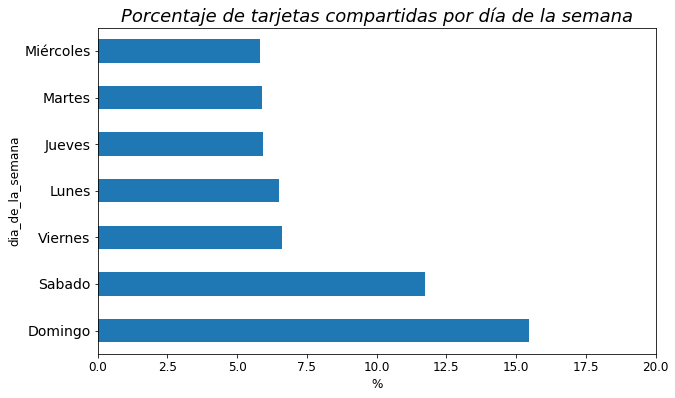

In [176]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
ax = viajes_compartidos_por_dia_sem.Porc_compartidos.plot.barh(rot=0)
plt.title('Porcentaje de tarjetas compartidas por día de la semana', fontsize=18,fontstyle='italic')
plt.xlabel('%', fontsize=12)
plt.ylabel('dia_de_la_semana', fontsize=12)
#plt.legend('Primer trimestre de 2019')
ax.set_xlim(0, 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.show()
##Ya lo hicimos por LINEA, hacer lo mismo por horas del dia y por dia de la semana##